<a href="https://colab.research.google.com/github/myasmin/Used-Cars-Data-Analysis/blob/master/Used_Cars_Data_Analysis-%20Outlier%20Detection%20for%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset -f

In [ ]:
from google.colab import files,drive

In [ ]:
#import sys
#import os
#from contextlib import redirect_stdout, redirect_stderr
#import io

# Create a string buffer to capture the output
#f = io.StringIO()

# Suppress the output from files.upload()
#with redirect_stdout(f), redirect_stderr(f):
#    files.upload()

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Install Kaggle API client
!pip install kaggle

In [ ]:
# Set Kaggle API key (path to your kaggle.json file in Google Drive)
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/Used Cars Data Analysis'

In [ ]:
# Download the dataset
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

# Unzip the dataset (if needed)
!unzip craigslist-carstrucks-data.zip -d /content

Dataset URL: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
License(s): CC0-1.0
 93% 244M/262M [00:01<00:00, 175MB/s]
100% 262M/262M [00:01<00:00, 186MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: /content/vehicles.csv   


In [ ]:
# List the files in the current directory
os.listdir()

['.config',
 'drive',
 'craigslist-carstrucks-data.zip',
 'gdrive',
 'vehicles.csv',
 'sample_data']

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

# Load the data into a DataFrame
df = pd.read_csv('vehicles.csv')

# Display the first few rows of the DataFrame to verify
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [ ]:
df.shape

(426880, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
# Keep a Backup of the raw data
# df.to_csv('gdrive/My Drive/Colab Notebooks/Used Cars Data Analysis/backup.csv', index=False)

Find Missing Values:

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


In [ ]:
## Delete Unnecessary Columns:
df.drop(columns=["id", "url", "region_url", "VIN", "image_url", "description", "county"],inplace=True)

In [ ]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Price is our variable of interest.

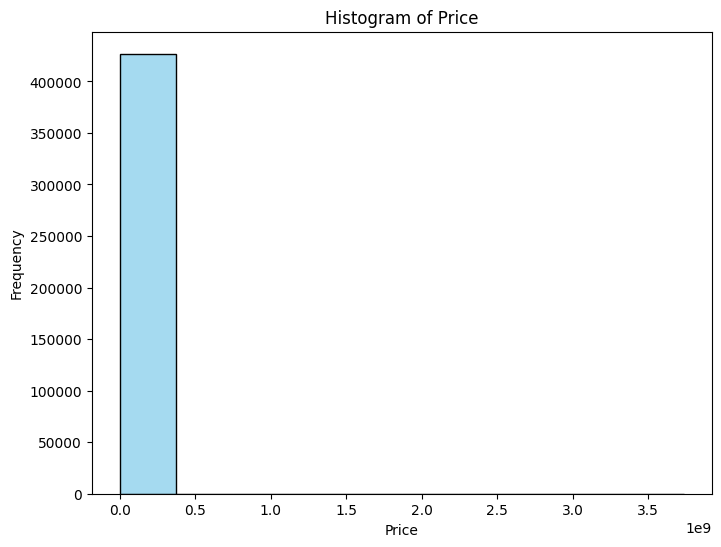

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

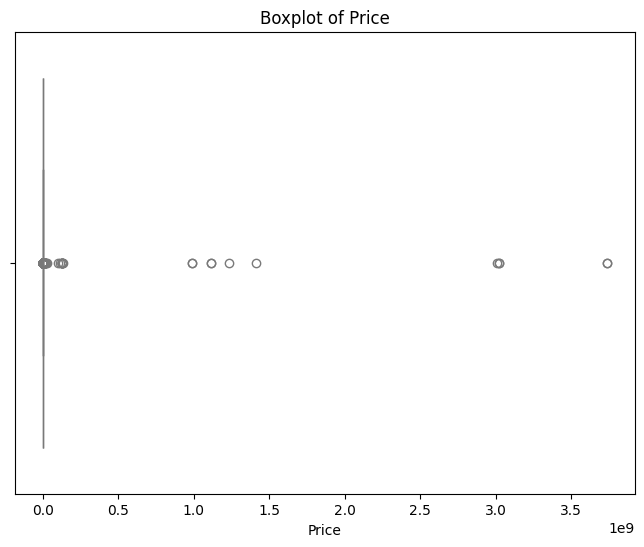

In [ ]:
# Plot the boxplot for the 'price' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], color='lightblue')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [ ]:
df['price'].min()

0

In [ ]:
df['price'].max()

3736928711

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a set of outliers
outliers = (df['price'][ (df['price'] < lower_bound) | (df['price'] > upper_bound) ])

print("Outlier detected using Inter Quartile Range:", outliers)

Outlier detected using Inter Quartile Range: 204           58977
280       987654321
346           98900
365           72900
461           99950
            ...    
426694        59900
426716        65950
426778        65995
426810        58995
426840        65999
Name: price, Length: 8177, dtype: int64


In [ ]:
outliers.min()

57400

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for the price column
z_scores = zscore(df['price'])

# Identify outliers with Z-scores greater than 3 or less than -3
outliers1 = df['price'][abs(z_scores) > 3]

print("Outliers detected using Z-score:", outliers1)

Outliers detected using Z-score: 280        987654321
1838        99999999
29386     1111111111
37409     1111111111
37410     3009548743
91576     3024942282
122470     987654321
137807     123456789
153082    1234567890
184704    1410065407
193736     123456789
207080     123456789
230753     135008900
241404     113456789
257840    3024942282
288356     123456789
307488     123456789
318592    3736928711
356716    3736928711
358555     123456789
Name: price, dtype: int64


In [ ]:
outliers.min()

57400

In [ ]:
outliers1.min()

99999999

In [ ]:
# Delete rows where 'price' is greater than 57400
df1 = df[df['price'] <= 57400]


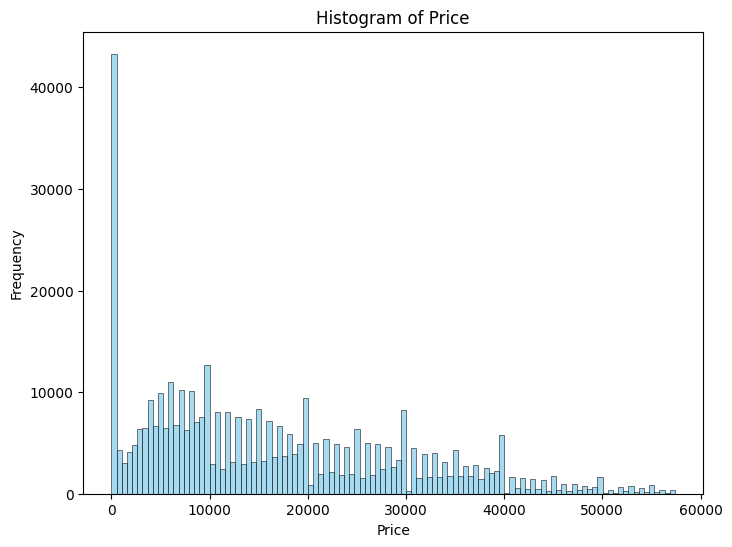

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['price'], kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Delete rows where 'price' is 0
df2 = df1[df1['price'] != 0]

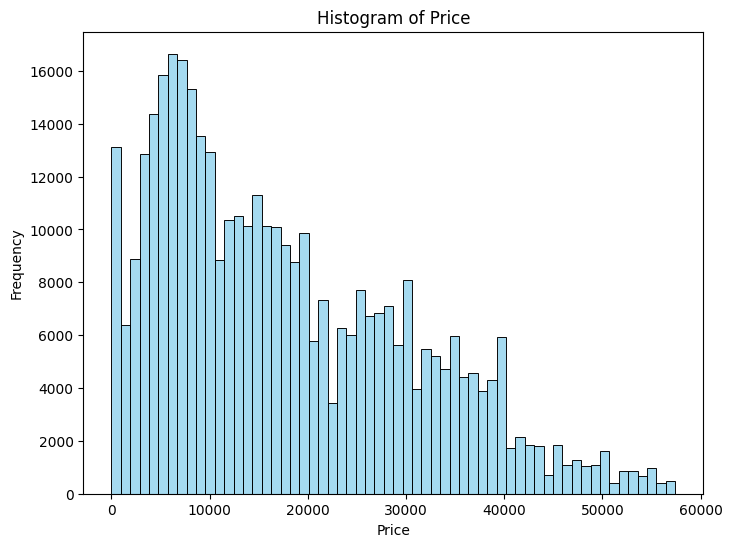

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df2['price'],bins=60, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()